In [1]:
import numpy as np
import pandas as pd
from copy import deepcopy 

import mplsoccer
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import matplotlib.patheffects as path_effects

from matplotlib.patches import Arc
from plotly.subplots import make_subplots
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.projections import get_projection_class

In [2]:
eventDatall = pd.read_csv('data/matchwise_events_data_updated.csv',low_memory=False)

In [3]:
pd.set_option("display.max_columns",50)
pd.set_option("display.max_rows",100)

In [4]:
eventDatall.columns[eventDatall.columns.str.contains('pressure')]

Index(['under_pressure'], dtype='object')

In [5]:
eventDatall[['type.id','type.name']].drop_duplicates()

,type.id,type.name
0,35,Starting XI
2,18,Half Start
4,30,Pass
5,42,Ball Receipt*
8,43,Carry
39,17,Pressure
42,14,Dribble
43,4,Duel
87,22,Foul Committed
88,21,Foul Won


In [6]:
eventDatall[eventDatall['type.id']==17]

,match_id,id,index,period,timestamp,minute,second,possession,duration,type.id,type.name,possession_team.id,possession_team.name,play_pattern.id,play_pattern.name,team.id,team.name,tactics.formation,tactics.lineup,related_events,off_camera,location,player.id,player.name,position.id,...,pass.inswinging,clearance.aerial_won,clearance.other,shot.open_goal,pass.straight,shot.saved_to_post,goalkeeper.shot_saved_to_post,pass.miscommunication,bad_behaviour.card.id,bad_behaviour.card.name,shot.deflected,block.save_block,foul_committed.penalty,foul_won.penalty,goalkeeper.punched_out,shot.saved_off_target,goalkeeper.shot_saved_off_target,dribble.no_touch,goalkeeper.success_in_play,goalkeeper.lost_in_play,jersey_number,started,subID,minMinute,minsPlayed
39,303421,d9d8c4bc-4837-4034-aafa-fea9ff4841b6,40,1,00:39.6,0,39,2,0.612580,17,Pressure,217,Barcelona,9,From Kick Off,206,Deportivo Alavés,NaN,NaN,NaN,NaN,"[63.5, 17.9]",3513.0,Oliver Burke,16.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0,Yes,NaN,0.0,45.0
86,303421,5196d180-5085-43f6-9160-fd31b86d8ac3,87,1,01:13.0,1,12,2,0.989270,17,Pressure,217,Barcelona,9,From Kick Off,206,Deportivo Alavés,NaN,NaN,['7767af25-be00-4696-ba63-d7d14f5f171a'],NaN,"[43.5, 24.9]",6632.0,Manuel Alejandro García Sánchez,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0,Yes,NaN,0.0,58.0
96,303421,b5af56dd-bf65-424b-be5b-0817093c44ae,97,1,01:44.4,1,44,3,0.326289,17,Pressure,217,Barcelona,3,From Free Kick,206,Deportivo Alavés,NaN,NaN,"['2d7bf141-e683-4d49-aa7a-efd756b5d559', 'd382...",NaN,"[36.3, 52.9]",6659.0,Víctor Camarasa Ferrando,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,Yes,NaN,0.0,64.0
97,303421,d0eb38bd-0f90-490d-9800-98bf0915c0ea,98,1,01:44.5,1,44,3,0.700558,17,Pressure,217,Barcelona,3,From Free Kick,206,Deportivo Alavés,NaN,NaN,"['2d7bf141-e683-4d49-aa7a-efd756b5d559', 'd382...",NaN,"[35.8, 42.8]",6632.0,Manuel Alejandro García Sánchez,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0,Yes,NaN,0.0,58.0
103,303421,cf2e00a7-e84b-43e1-9478-3e9a8ec6f88c,104,1,01:45.9,1,45,3,0.768628,17,Pressure,217,Barcelona,3,From Free Kick,206,Deportivo Alavés,NaN,NaN,"['bc28474b-89ab-44d3-90d6-93b3becda7ae', 'bc86...",NaN,"[35.2, 26.6]",3513.0,Oliver Burke,16.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0,Yes,NaN,0.0,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128964,303731,9c9e428f-ecc1-4db5-8e41-60b7884243b2,3596,2,45:25.9,90,25,184,1.508156,17,Pressure,217,Barcelona,1,Regular Play,322,Eibar,NaN,NaN,"['06cbc342-5a5b-40b4-920d-839612a0ef8f', 'e084...",NaN,"[65.5, 32.2]",23808.0,Enrique González Casín,23.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23808.0,65.0,26.0
128972,303731,4539bd8d-008e-482f-a14a-7133545d53b6,3604,2,45:36.0,90,36,184,0.661125,17,Pressure,217,Barcelona,1,Regular Play,322,Eibar,NaN,NaN,"['cdd40cf8-4fc9-4238-8d9f-4da3a3ad53f7', 'e100...",NaN,"[47.5, 50.0]",6867.0,Papa Kouly Diop,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,Yes,NaN,0.0,90.0
128984,303731,fdc3a949-4a1e-42c0-92d5-24f182c0d2a4,3616,2,45:41.8,90,41,184,1.343947,17,Pressure,217,Barcelona,1,Regular Play,322,Eibar,NaN,NaN,['d1499ca6-67f7-4fff-af34-f6d96535f980'],NaN,"[59.3, 23.9]",7154.0,Sebastián Carlos Cristóforo Pepe,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7154.0,82.0,8.0
129025,303731,48682194-1ffd-477e-8715-9fa05e6bd201,3657,2,46:33.7,91,33,184,0.745519,17,Pressure,217,Barcelona,1,Regular Play,322,Eibar,NaN,NaN,['d37597a7-915f-4e2e-91d7-f5d1db30b636'],NaN,"[35.6, 13.2]",8555.0,Pablo Ezequiel De Blasi

In [7]:
eventDatall[eventDatall['type.id']==17].iloc[0].values

array([303421, 'd9d8c4bc-4837-4034-aafa-fea9ff4841b6', 40, 1, '00:39.6',
       0, 39, 2, 0.61258, 17, 'Pressure', 217, 'Barcelona', 9,
       'From Kick Off', 206, 'Deportivo Alavés', nan, nan, nan, nan,
       '[63.5, 17.9]', 3513.0, 'Oliver Burke', 16.0, 'Left Midfield', nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, 24.0, 'Yes', nan, 0.0,
       45.0], dtype=object)

In [8]:
eventDatall["startX"]=eventDatall["location"].str.split\
                        (", ",expand=True)[0].str[1:].apply(pd.to_numeric)
eventDatall["startY"]=eventDatall["location"].str.split\
                        (", ",expand=True)[1].str[:-1].apply(pd.to_numeric)

In [9]:
pressureDatall = deepcopy(eventDatall[eventDatall['type.id']==17])

# Generating Pressure Maps

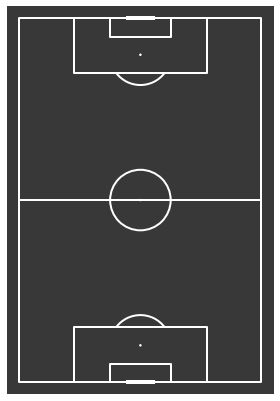

In [10]:
pitch = mplsoccer.VerticalPitch(pitch_color='#383838', line_zorder=2, line_color='#ffffff')
# Draw the pitch according to the set Pitch Parameters:
fig, ax = pitch.draw(figsize=(4, 6))

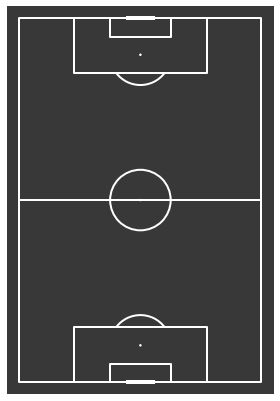

In [11]:
pitch = mplsoccer.VerticalPitch(pitch_color='#383838', line_zorder=2, line_color='#ffffff')
# Draw the pitch according to the set Pitch Parameters:
fig, ax = pitch.draw(figsize=(4, 6))
# Calculating the pressure difference
"""
The 'pitch.bin_statistic_positional' function
calculates binned statistics for the Juego de posición (position game) concept.
It uses scipy.stats.binned_statistic_2d.
"""
bin_statistic = pitch.bin_statistic_positional(x=pressureDatall["startX"],
                                             y=pressureDatall["startY"],
                                             statistic='count',
                                             positional='vertical',
                                             normalize=True)

In [12]:
bin_statistic
#pitch is divided in six parts ;statistic is the percentage of density of points in that region
# x and y grid are the coordinates of the boxes/ bins formed

[{'statistic': array([[0.07556722, 0.22988937, 0.25379711, 0.22782674, 0.15310332,
          0.05981624]]),
  'x_grid': array([[  0.,  18.,  39.,  60.,  81., 102., 120.],
         [  0.,  18.,  39.,  60.,  81., 102., 120.]]),
  'y_grid': array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
         [80., 80., 80., 80., 80., 80., 80.]]),
  'cx': array([[  9. ,  28.5,  49.5,  70.5,  91.5, 111. ]]),
  'cy': array([[40., 40., 40., 40., 40., 40.]])}]

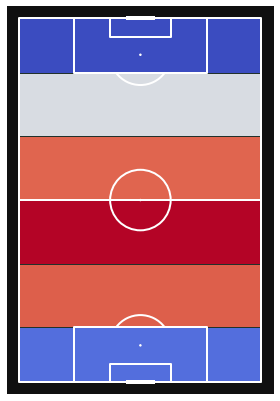

In [13]:
pitch = mplsoccer.VerticalPitch(pitch_color='#101010', line_zorder=2, line_color='#ffffff')
# Draw the pitch according to the set Pitch Parameters:
fig, ax = pitch.draw(figsize=(4, 6))

# Calculating the pressure difference
"""
The 'pitch.bin_statistic_positional' function
calculates binned statistics for the Juego de posición (position game) concept.
It uses scipy.stats.binned_statistic_2d.
"""
bin_statistic = pitch.bin_statistic_positional(pressureDatall["startX"],
                                               pressureDatall["startY"],
                                               statistic='count',
                                               positional='vertical',
                                               normalize=True)
# Plot the Heatmap according to the positions selected above
pitch.heatmap_positional(bin_statistic,
                         ax=ax,
                         cmap='coolwarm',
                         edgecolors='#22312b')

In [14]:
path_eff = [path_effects.Stroke(linewidth=3, foreground='black'),
           path_effects.Normal()]

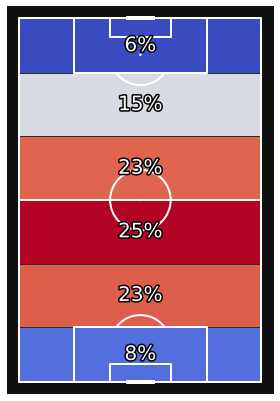

In [15]:
pitch = mplsoccer.VerticalPitch(pitch_color='#101010', line_zorder=2, line_color='#ffffff')
# Draw the pitch according to the set Pitch Parameters:
fig, ax = pitch.draw(figsize=(4, 6))

# Calculating the pressure difference
"""
The 'pitch.bin_statistic_positional' function
calculates binned statistics for the Juego de posición (position game) concept.
It uses scipy.stats.binned_statistic_2d.
"""
bin_statistic = pitch.bin_statistic_positional(pressureDatall["startX"],
                                               pressureDatall["startY"],
                                               statistic='count',
                                               positional='vertical',
                                               normalize=True)
# Plot the Heatmap according to the positions selected above
pitch.heatmap_positional(bin_statistic,
                         ax=ax,
                         cmap='coolwarm',
                         edgecolors='#22312b')

labels = pitch.label_heatmap(bin_statistic,color='white',
                            fontsize=20,ax=ax,ha='center',
                            va='center',str_format='{:.0%}',
                            path_effects = path_eff)

NOTE: In case you would like to know more about path effects, kindly check out [Matplotlib Path Effects Docs](https://matplotlib.org/stable/tutorials/advanced/patheffects_guide.html)

# Different Postional Sections

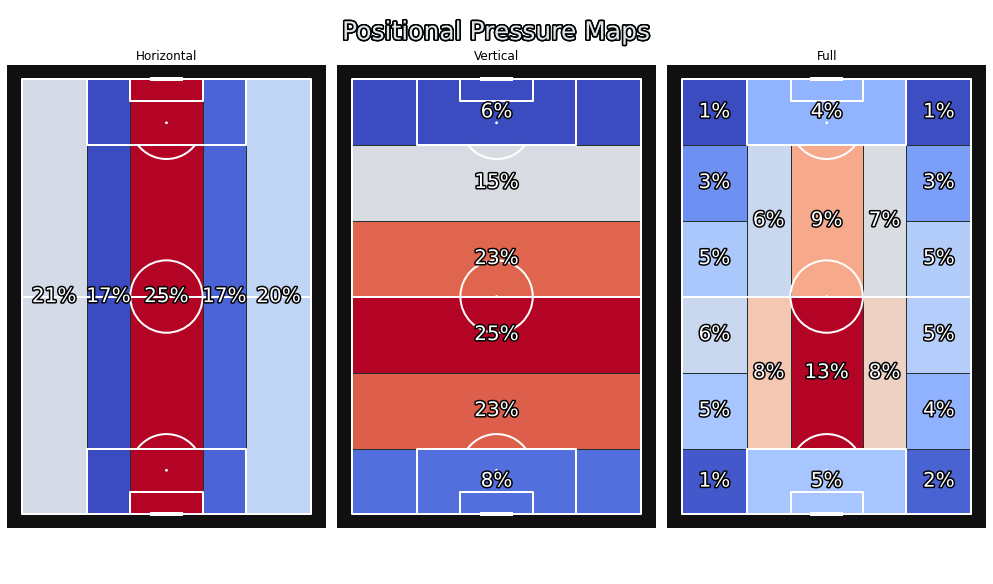

In [16]:
pitch = mplsoccer.VerticalPitch(pitch_color='#101010', line_zorder=2, line_color='#ffffff')
# Draw the pitch according to the set Pitch Parameters:
fig, axs = pitch.grid(nrows=1,ncols=3 , title_height=0.08,
                    axis=False)
pitchPos = ["horizontal","vertical",'full']
for idx, ax in enumerate(axs["pitch"]):
    pos = pitchPos[idx]
    bin_statistic = pitch.bin_statistic_positional(pressureDatall["startX"],
                                               pressureDatall["startY"],
                                               statistic='count',
                                               positional=pos,
                                               normalize=True)
    pitch.heatmap_positional(bin_statistic,
                            ax=ax,
                            cmap="coolwarm",edgecolors ="#22312b")
    
    labels = pitch.label_heatmap(bin_statistic,color='white',
                            fontsize=20,ax=ax,ha='center',
                            va='center',str_format='{:.0%}',
                            path_effects = path_eff)
    axs['title'].text(0.5,0.5,"Positional Pressure Maps",color='#dee6ea',
                  va='center', ha='center', path_effects=path_eff,fontsize = 25)
    ax.set_title(pos.capitalize())

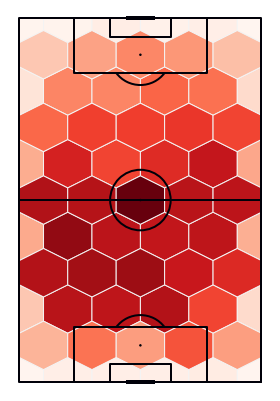

In [17]:
pitch = mplsoccer.VerticalPitch(line_color='#000009',
                                pitch_color='white',
                                line_zorder=2)
fig, ax = pitch.draw(figsize=(4, 6))
hexmap = pitch.hexbin(pressureDatall["startX"],
                      pressureDatall["startY"],
                      ax=ax, edgecolors='#f4f4f4',
                      gridsize=(5, 5), cmap="Reds")

# Analysis of Pressure Maps

Team wise

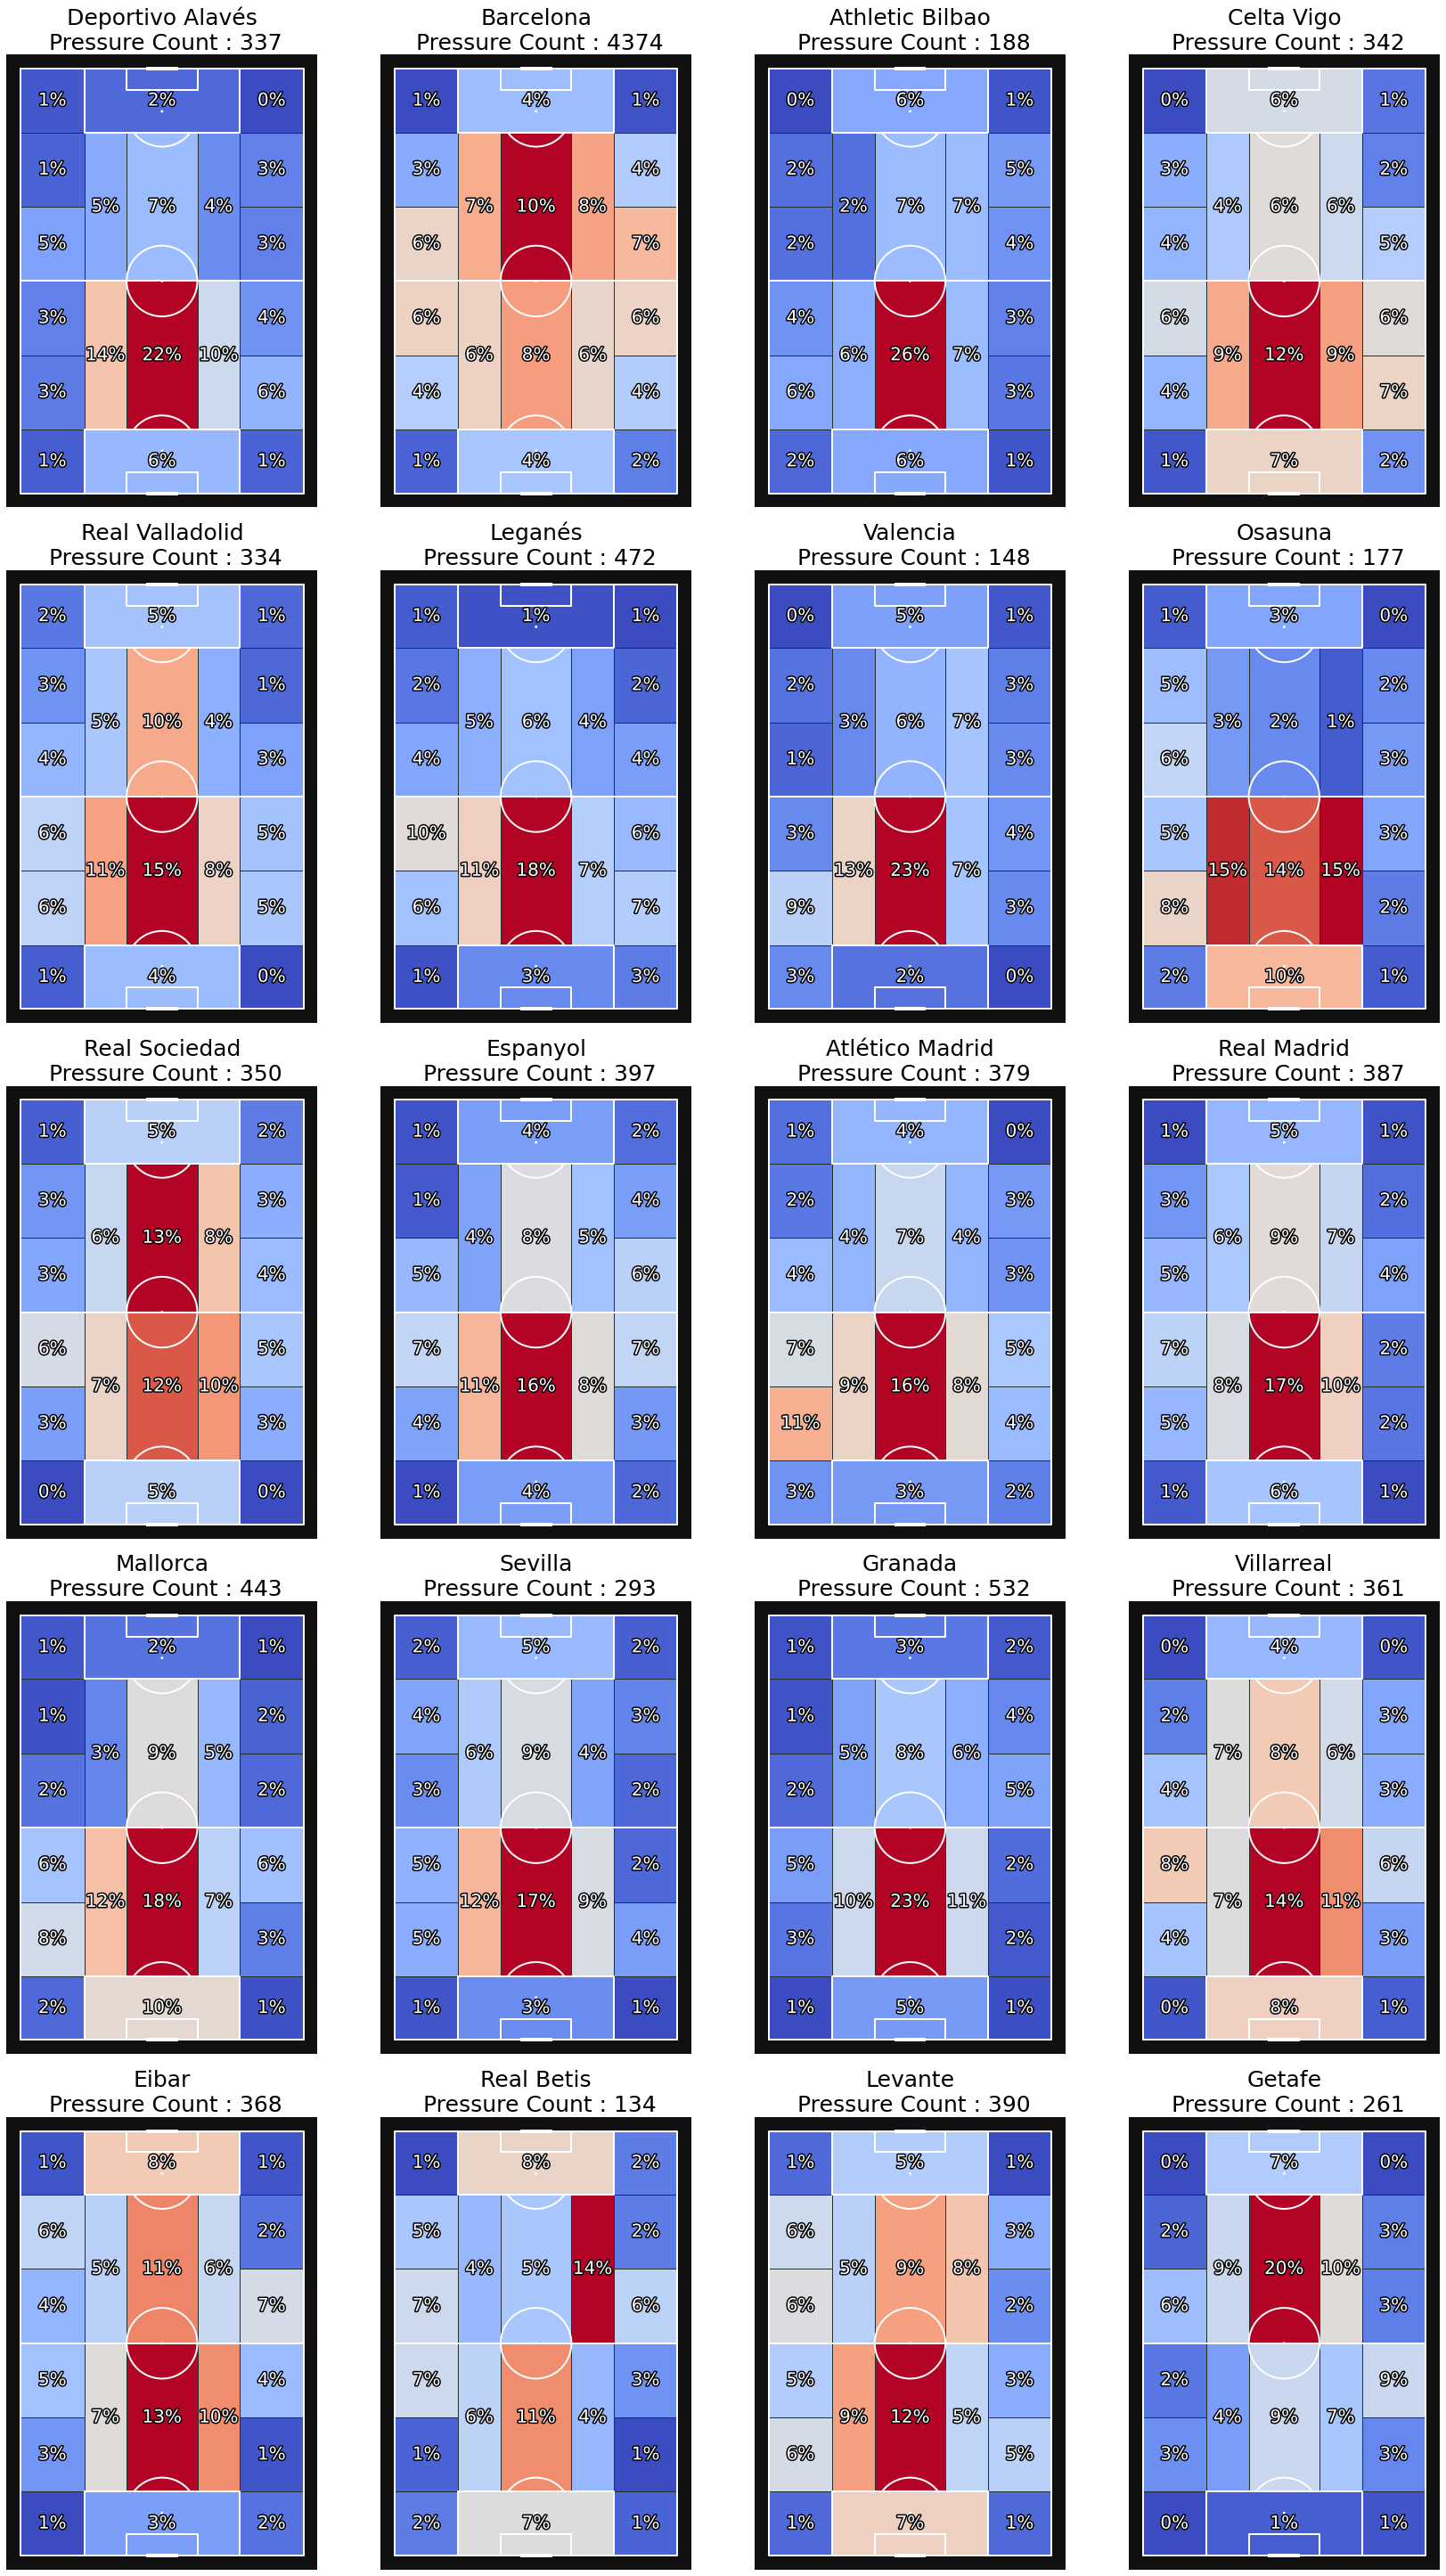

In [18]:
pitch = mplsoccer.VerticalPitch(pitch_color='#101010', line_zorder=2, line_color='#ffffff')
# Draw the pitch according to the set Pitch Parameters:
fig, axs = pitch.grid(nrows=5, ncols=4,
                      axis=False, figheight=40,
                     space=0.1, grid_height=0.98, grid_width=0.9,
                     title_height=0, endnote_height=0)
teamIDs = pressureDatall['team.id'].unique()
for idx, ax in enumerate(axs["pitch"].flat):
    teamData = pressureDatall[pressureDatall["team.id"]==teamIDs[idx]]
    bin_statistic = pitch.bin_statistic_positional(teamData["startX"],
                                               teamData["startY"],
                                               statistic='count',
                                               positional="full",
                                               normalize=True)
    pitch.heatmap_positional(bin_statistic,
                            ax=ax,
                            cmap="coolwarm",edgecolors ="#22312b")
    
    labels = pitch.label_heatmap(bin_statistic,color='white',
                            fontsize=20,ax=ax,ha='center',
                            va='center',str_format='{:.0%}',
                            path_effects = path_eff)
    teamName= teamData["team.name"].unique().item()
    totPressure=len(teamData)
    ax.set_title(teamName+"\n Pressure Count : "+str(totPressure),fontsize = 25)
    
#upper goal is opposition goal